In [1]:
"""\
# Copyright (C) 2024 Jesús Bautista Villar <jesbauti20@gmail.com>
- Source seeking simulations (distributed computing) -
"""
!python -V || python3 -V

Python 3.10.12


In [6]:
# If executed from Google Colab --------------------------------------------------------
# !git clone https://github.com/jesusBV20/source_seeking_distr.git
# !rsync -a source_seeking_distr/ .
# !rm -r source_seeking_distr

# If you want to use latex with matplotlib ---------------------------------------------
# !apt install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super
# !pip install -y latex

In [1]:
import numpy as np
import os
import sys

from scipy.optimize import minimize

import matplotlib.pyplot as plt

# --------------------------------------------------------------------------------------

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Scalar field functions
from sourceseeking_distr.scalar_field.sigma_common import SigmaField
from sourceseeking_distr.scalar_field.sigma_funcs import SigmaGauss, SigmaNonconvex, SigmaFract 

# Main utility functions used along the notebook
from sourceseeking_distr.toolbox.math_utils import XY_distrib, norm_2
from sourceseeking_distr.toolbox.basic_utils import createDir
from sourceseeking_distr.toolbox.plot_utils import vector2d, unicycle_patch

# --------------------------------------------------------------------------------------

# Create the output directory
OUTPUT_FOLDER = os.path.join("..", "output")
createDir(OUTPUT_FOLDER)

The directory '../output' already exists!


## Proposition 1 - Paper example figure 

In [99]:
class Proposition1:
    def __init__(self, P: np.ndarray, sigma_field: SigmaField, epsilons: list[float]):
        self.N = P.shape[0]
        self.P = P
        self.sigma_field = sigma_field

        self.ep_min = epsilons[0]
        self.ep_max = epsilons[1]

        self.K_min = None
        self.M = None

        self.phi = np.random.uniform(0, 2*np.pi,[self.N])

    def analyse_field(self, debug=False):
        ps = np.linspace(self.sigma_field.mu[0] + self.ep_min, self.sigma_field.mu[0] + self.ep_max, 100)
        ps = [ps, ps*0 + self.sigma_field.mu[1]]

        grad_norms, hess_norms = [], []
        for x,y in zip(ps[0], ps[1]):
            grad = self.sigma_field.grad(np.array([x,y]))
            H = self.sigma_field.hessian(np.array([x,y]))
            grad_norms.append(np.linalg.norm(grad))
            hess_norms.append(norm_2(H))
        
        self.K_min = np.min(grad_norms)
        self.M = np.max(hess_norms)

        if debug:
            plt.plot(grad_norms)
            plt.show()
            plt.plot(hess_norms)
            plt.show()

    def plot(
            self, dpi=100, figsize=(14,8), xlim=[-5,60], ylim=[15,55], alpha_agts=0.8
            ):
        fig = plt.figure(dpi=dpi, figsize=figsize)
        ax = fig.subplots()

        # Axis configuration
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_xlabel("X [L]")
        ax.set_ylabel("Y [L]")
        ax.set_aspect("equal")

        # Draw the scalar field
        dx, dy = abs(xlim[0] - xlim[1]), abs(ylim[0] - ylim[1])
        kw_field = {"xlim": dx, "ylim": dy, "n": 1000, "contour_levels": 15}
        self.sigma_field.draw(fig, ax, **kw_field)
        
        # Draw the agents
        kw_patch = {"size": dx / 130 * 3, "lw": 0.5}
        for n in range(self.N):
            icon = unicycle_patch(
                self.P[n, :], self.phi[n], "royalblue", **kw_patch
            )
            icon.set_alpha(alpha_agts)
            ax.add_patch(icon)
            
        # Draw the subset S

        ax.grid(True)
        plt.show()

In [100]:
## Parameters #####
pc = np.array([-45,-50])
N = 20
p = XY_distrib(N, pc, np.array([2,7]))
epsilons = [2,10]

q0 = [p, 15]

# ----------------------------------------------------------------------
# Generating the scalar field
# ----------------------------------------------------------------------
mu = [40,40]
max_int = 40
dev = 10

sigma_field = SigmaGauss(mu=mu, max_intensity=max_int, dev=dev)

0.03128341551803647 0.015641707759018235


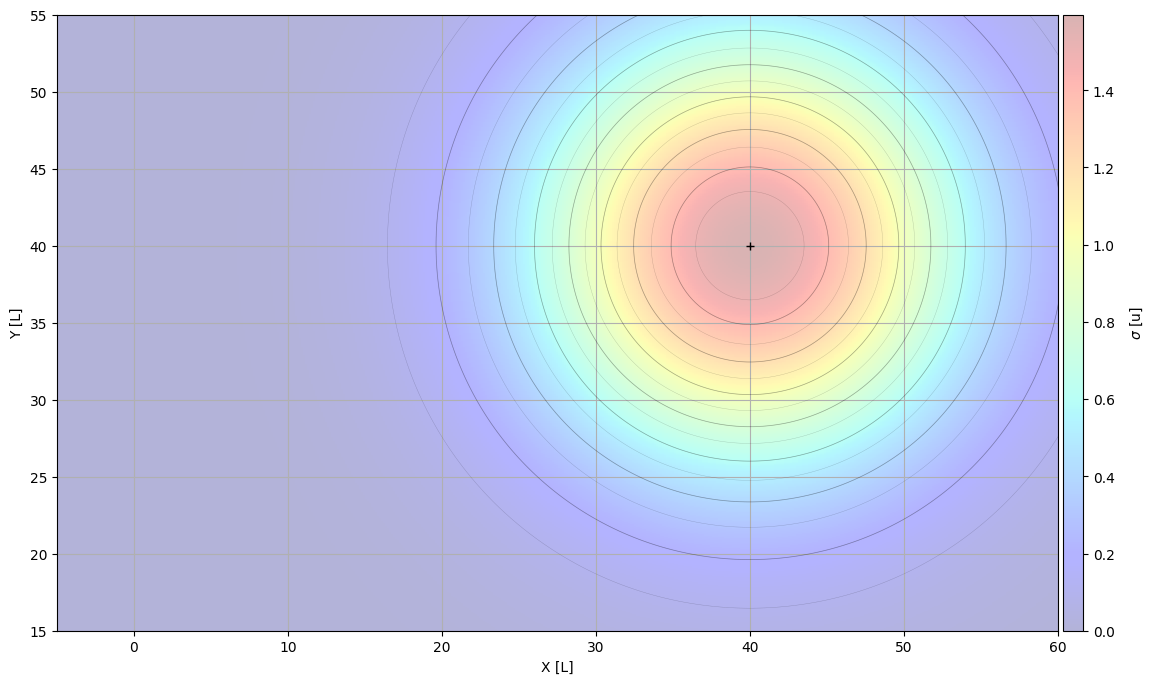

In [102]:
prop1 = Proposition1(p, sigma_field, epsilons)
prop1.analyse_field()
print(prop1.K_min, prop1.M)
prop1.plot()